In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = '/home/niell_lab/data/jumping/timebin_eyecams_2sec/pooled_jump_data.nc'

In [4]:
pooled = xr.open_dataset(path)

In [5]:
lags = range(-30, 30)

In [66]:
def mean_within_animal(data):
    time_sel = data.sel(frame=range(60))
    data_mean = time_sel.to_array().mean(dim='variable',skipna=True)
    return(np.array(data_mean))

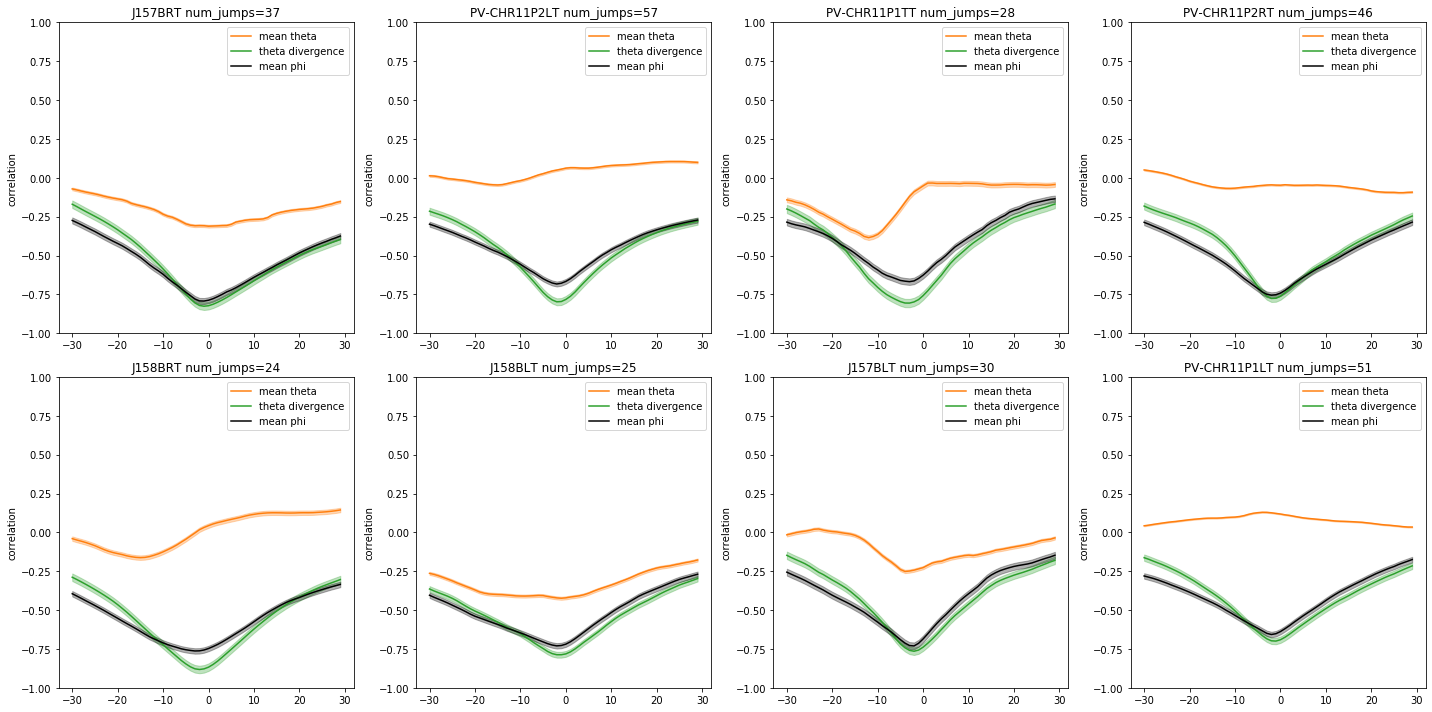

In [82]:
try:
    pooled_da = pooled.to_array()
except AttributeError:
    pooled_da = pooled

# organize data for head xcorr with th, divergence, and phi (grouped within each animal's jumps)
try:
    animal_names = list(set([i.split('_')[1] for i in list(pooled_da.variables.values)]))
except:
    animal_names = list(set([i.split('_')[1] for i in list(pooled_da['variable'].values)]))
for var in pooled:
    pooled[var].attrs['animal'] = var.split('_')[1]
    
plt.subplots(2,4,figsize=(20,10))

count = 0
for animal_name in animal_names:
    count += 1
    count1 = 0
    for var in list(pooled.keys()):
        if pooled[var].attrs['animal']==animal_name:
            if count1 == 0:
                this_animal = pooled[var].to_dataset()
                count1 += 1
            else:
                this_animal = xr.merge([this_animal, pooled[var]])
                
    
    ani_th_gaze = mean_within_animal(this_animal.sel(jump_params='th_gaze'))
    ani_th_div = mean_within_animal(this_animal.sel(jump_params='th_div'))
    ani_th_phi = - mean_within_animal(this_animal.sel(jump_params='th_phi'))

    # plot head xcorr
    y1 = ani_th_gaze
    err1 = np.std(np.array(ani_th_gaze,dtype=np.float64),0)/np.sqrt(np.size(ani_th_gaze,0))
    y2 = ani_th_div
    err2 = np.std(np.array(ani_th_div,dtype=np.float64),0)/np.sqrt(np.size(ani_th_div,0))
    y3 = ani_th_phi
    err3 = np.std(np.array(ani_th_phi,dtype=np.float64),0)/np.sqrt(np.size(ani_th_phi,0))
    plt.subplot(2,4,count)
    plt.plot(lags, y1, 'C1')
    plt.fill_between(lags, y1-err1, y1+err1, color='C1', alpha=0.3)
    plt.plot(lags, y2, 'C2')
    plt.fill_between(lags, y2-err2, y2+err2, color='C2', alpha=0.3)
    plt.plot(lags, y3, 'k')
    plt.fill_between(lags, y3-err3, y3+err3, color='k', alpha=0.3)
    plt.ylim([-1,1]); plt.ylabel('correlation'); plt.title(animal_name+' num_jumps='+str(len(this_animal)))
    plt.legend(['mean theta', 'theta divergence', 'mean phi'])
plt.tight_layout()
plt.show()

In [90]:
def mean_within_animal2(data):
    time_sel = data.sel(frame=range(60))
    data_mean = time_sel.mean(dim='variable',skipna=True)
    out = []
    for var in data_mean:
        out.append(list(data_mean[var].values))
    return np.array(out)

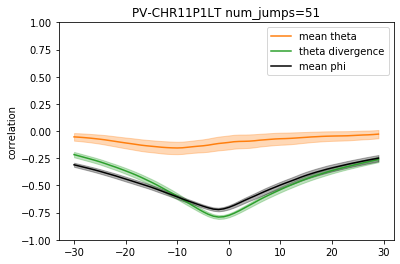

In [94]:
try:
    pooled_da = pooled.to_array()
except AttributeError:
    pooled_da = pooled

# organize data for head xcorr with th, divergence, and phi (grouped within each animal's jumps)
try:
    animal_names = list(set([i.split('_')[1] for i in list(pooled_da.variables.values)]))
except:
    animal_names = list(set([i.split('_')[1] for i in list(pooled_da['variable'].values)]))
for var in pooled:
    pooled[var].attrs['animal'] = var.split('_')[1]

pool_by_animal = xr.Dataset()
for animal_name in animal_names:
    this_animal = pooled.filter_by_attrs(animal=animal_name).to_array()
    this_animal.name = animal_name
    pool_by_animal = xr.merge([pool_by_animal, this_animal])
                
ani_th_gaze = mean_within_animal2(pool_by_animal.sel(jump_params='th_gaze'))
ani_th_div = mean_within_animal2(pool_by_animal.sel(jump_params='th_div'))
ani_th_phi = - mean_within_animal2(pool_by_animal.sel(jump_params='th_phi'))

# plot head xcorr
y1 = np.mean(ani_th_gaze,0)
err1 = np.std(np.array(ani_th_gaze,dtype=np.float64),0)/np.sqrt(np.size(ani_th_gaze,0))
y2 = np.mean(ani_th_div,0)
err2 = np.std(np.array(ani_th_div,dtype=np.float64),0)/np.sqrt(np.size(ani_th_div,0))
y3 = np.mean(ani_th_phi,0)
err3 = np.std(np.array(ani_th_phi,dtype=np.float64),0)/np.sqrt(np.size(ani_th_phi,0))
plt.plot(lags, y1, 'C1')
plt.fill_between(lags, y1-err1, y1+err1, color='C1', alpha=0.3)
plt.plot(lags, y2, 'C2')
plt.fill_between(lags, y2-err2, y2+err2, color='C2', alpha=0.3)
plt.plot(lags, y3, 'k')
plt.fill_between(lags, y3-err3, y3+err3, color='k', alpha=0.3)
plt.ylim([-1,1]); plt.ylabel('correlation'); plt.title(animal_name+' num_jumps='+str(len(this_animal)))
plt.legend(['mean theta', 'theta divergence', 'mean phi'])

In [102]:
np.min(y3)

-0.7217853615053476

In [103]:
err3[np.argmin(y3)]

0.016266802202709218

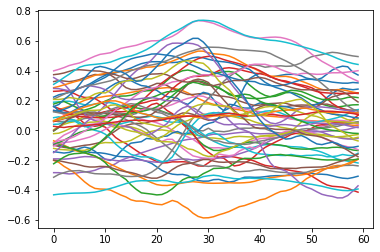

In [88]:
plt.plot(np.array(this_animal.sel(jump_params='th_gaze').to_array()).T)